In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.8.0'

In [3]:
keras.__version__

'2.8.0'

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
housing = fetch_california_housing()

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(housing.data, housing.target)

In [7]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [9]:
X_train.shape[1:]

(8,)

## Building Wide and deep Neural network

In [10]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 =keras.layers.Dense(10, activation="relu")(hidden1)
concat  =keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

2022-04-20 11:10:08.416800: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-20 11:10:09.195826: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22824 MB memory:  -> device: 0, name: NVIDIA TITAN RTX, pci bus id: 0000:02:00.0, compute capability: 7.5


In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 10)           310         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 18)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

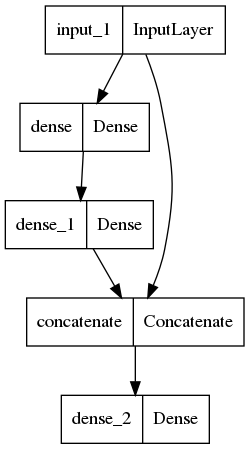

In [14]:

tf.keras.utils.plot_model(model)

In [15]:
model.compile(loss='mean_squared_error', optimizer="sgd")

In [16]:
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Epoch 1/20
363/363 [==============================] - 3s 4ms/step - loss: 0.8561 - val_loss: 0.4572
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4857 - val_loss: 0.4384
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4820 - val_loss: 0.3931
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4152 - val_loss: 0.5155
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4265 - val_loss: 0.3598
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3807 - val_loss: 0.3567
Epoch 7/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3755 - val_loss: 0.3598
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3691 - val_loss: 0.7392
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4109 - val_loss: 0.3466
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3733 - val_loss: 0.3733

In [17]:
model.evaluate(X_test, Y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3511


0.35106879472732544

## Building model by sending different number of features in deep and wide path

In [19]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[3], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 =keras.layers.Dense(10, activation="relu")(hidden1)
concat  =keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [29]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 3)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           120         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 10)           310         ['dense_3[0][0]']                
                                                                                            

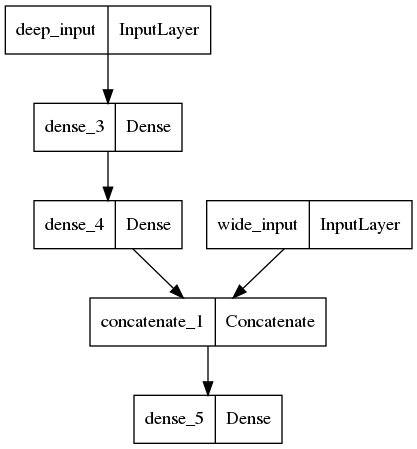

In [30]:
keras.utils.plot_model(model)

In [20]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.001))

/home/gpu/pyenv/py3.8env/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [27]:
X_train_A, X_train_B = X_train[:,:5], X_train[:, :3]
X_valid_A, X_valid_B = X_valid[:,:5], X_valid[:, :3]
X_test_A, X_test_B = X_test[:, :5], X_test[:, :3]

In [28]:
history = model.fit((X_train_A, X_train_B), Y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), Y_valid))

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 2.4328 - val_loss: 0.7644
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7304 - val_loss: 0.6335
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6722 - val_loss: 0.6024
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6473 - val_loss: 0.5827
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: 0.6304 - val_loss: 0.5697
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6177 - val_loss: 0.5605
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6084 - val_loss: 0.5531
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6010 - val_loss: 0.5471
Epoch 9/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5952 - val_loss: 0.5449
Epoch 10/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5913 - val_loss: 0.5398

In [31]:
model.evaluate((X_test_A, X_test_B), Y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.5818


0.5818333625793457

### Adding Auxiliary output for Regularization (prevent overfitting of the model)

In [33]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[3], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 =keras.layers.Dense(10, activation="relu")(hidden1)
concat  =keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="main_op")(concat)
aux_output = keras.layers.Dense(1, name="aux_op")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [34]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 3)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 30)           120         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_7 (Dense)                (None, 10)           310         ['dense_6[0][0]']                
                                                                                            

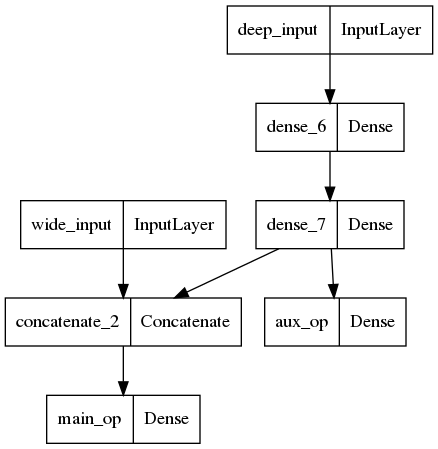

In [35]:
keras.utils.plot_model(model)

#### Now we want to give more weightage to main op than aux op, while training and calculating loss

In [37]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [38]:
history = model.fit((X_train_A, X_train_B), Y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), Y_valid))

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 1.0432 - main_op_loss: 0.8875 - aux_op_loss: 2.4447 - val_loss: 0.5794 - val_main_op_loss: 0.5657 - val_aux_op_loss: 0.7022
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6097 - main_op_loss: 0.6028 - aux_op_loss: 0.6715 - val_loss: 0.5429 - val_main_op_loss: 0.5389 - val_aux_op_loss: 0.5789
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5954 - main_op_loss: 0.5934 - aux_op_loss: 0.6133 - val_loss: 0.5315 - val_main_op_loss: 0.5288 - val_aux_op_loss: 0.5558
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5844 - main_op_loss: 0.5826 - aux_op_loss: 0.6013 - val_loss: 0.5287 - val_main_op_loss: 0.5269 - val_aux_op_loss: 0.5454
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5717 - main_op_loss: 0.5692 - aux_op_loss: 0.5940 - val_loss: 0.5317 - val_main_op_loss: 0.5301 - val_aux_op_loss: 0.5466
Epoch 6/20

In [39]:
model.evaluate((X_test_A, X_test_B), Y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.5621 - main_op_loss: 0.5624 - aux_op_loss: 0.5591


[0.5620712637901306, 0.562396764755249, 0.559139609336853]